when outlier are dangerous?
1)some type you should remove ouliers.

effect of ouliers on ML algorithm .
-Linear regression
-logistic regression
-Adaboost
-also in deep learning 

 tree base algorithm not effective on outliear
 
 
How to treat the outliers?
1)trimming -remove the outliears  
2)capping-limit at outliers(distrbution).
3)missing values-treat as missing values.
4)discretization.


how to detect the outliers?
-1)normal distrbution.   if your data out of range 1-(mean+-3SD) then remove it
-2)skewed distribution  , boxplot or quartile range
-3)other distrbution,  percentile  based approch.



which technique we will use?
1) z-score treatment
2) IQR based filtering
3) percentile based approch
4) winsorization 


# Z-Score treatment approch

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
placement = pd.read_csv('placement.csv')
placement.sample(5)

,cgpa,placement_exam_marks,placed
579,7.13,13.0,0
573,7.23,54.0,1
134,6.33,93.0,0
693,6.64,42.0,1
555,6.46,32.0,0


C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AttributeError: module 'seaborn' has no attribute 'show'

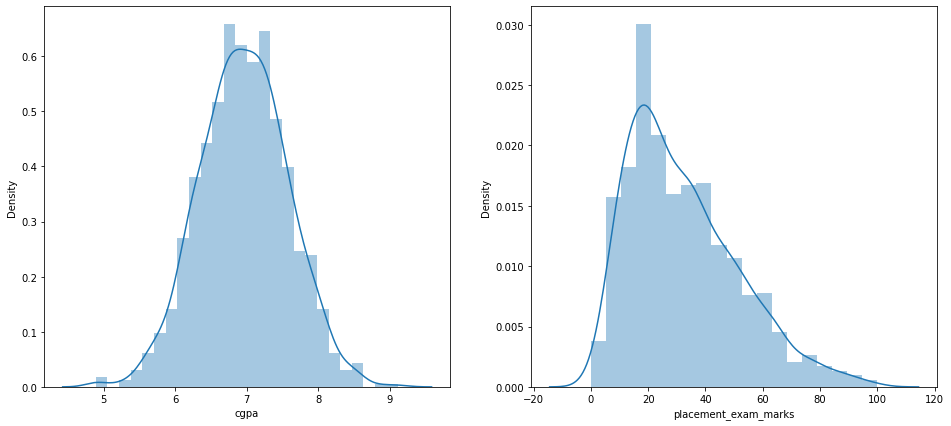

In [54]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)

sns.distplot(placement['cgpa'])


plt.subplot(1,2,2)
sns.distplot(placement['placement_exam_marks'])

sns.show()

In [55]:
print("Mean of CGPA ",placement['cgpa'].mean())
print("Std of CGPA ",placement['cgpa'].std())
print("Min of CGPA ",placement['cgpa'].min())
print("Max of CGPA ",placement['cgpa'].max())


Mean of CGPA  6.96124000000001
Std of CGPA  0.6158978751323894
Min of CGPA  4.89
Max of CGPA  9.12


In [82]:
#find the bountries

Highest =placement['cgpa'].mean()+3*placement['cgpa'].std() 
lowest=placement['cgpa'].mean()-3*placement['cgpa'].std() 

lowest

4.623477740819323

In [83]:
#finding the outliear

placement[(placement['cgpa'] > Highest) | (placement['cgpa'] < lowest)]

,cgpa,placement_exam_marks,placed,Z-score
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062


# Trimming

In [70]:
new_placement = placement[(placement['cgpa'] < Highest) & (placement['cgpa'] > lowest)]

new_placement

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


# calculating the Z-score

In [72]:
 #caculating the z-score
    
placement['Z-score'] = (placement['cgpa'] - placement['cgpa'].mean()) / placement['cgpa'].std()

placement

,cgpa,placement_exam_marks,placed,Z-score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [76]:
# Keep the data between -3 to 3 range  thaty is outliers

placement[(placement['Z-score'] > 3) | (placement['Z-score'] < -3) ]

,cgpa,placement_exam_marks,placed,Z-score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


# Capping

In [79]:
#we already created a highest values and lowest values

placement['cgpa'] = np.where(placement['cgpa'] > Highest, Highest,
    np.where(placement['cgpa'] > lowest,lowest,
            placement['cgpa'])
        )

In [84]:
placement['cgpa'].describe()

count    1000.000000
mean        5.120307
std         0.165610
min         4.890000
25%         5.113546
50%         5.113546
75%         5.113546
max         8.808934
Name: cgpa, dtype: float64

# Outliers detection Using IQR

This is use for   skwed data

interquartile range (IQR) = Q3-Q1

wisker(min) =Q1-1.5*IQR     < is outliers          #This is called IQR proximity rule boundaries

wisker(max) =Q3+1.5*IQR     > is outliers         #This is called IQR proximity rule boundaries

In [86]:
placement2 = pd.read_csv('placement.csv')
placement2.sample(5)

,cgpa,placement_exam_marks,placed
457,6.58,20.0,0
480,6.80,37.0,0
833,7.29,23.0,1
483,7.93,25.0,0
933,6.01,9.0,0


In [87]:
placement2['placement_exam_marks'].skew()

0.8356419499466834

In [88]:
placement2['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

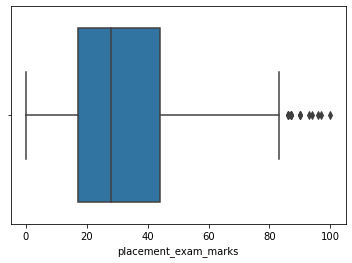

In [89]:
sns.boxplot(placement2['placement_exam_marks'])

In [92]:
percentile25 = placement2['placement_exam_marks'].quantile(0.25)
percentile75 = placement2['placement_exam_marks'].quantile(0.75)


print(percentile25)
print(percentile75)

17.0
44.0


In [95]:
IQR = percentile75 - percentile25
IQR

27.0

In [101]:
Upper_limit = percentile75 +  1.5*IQR
Lower_limit = percentile25 -  1.5*IQR

print(Upper_limit)
print(Lower_imit)

84.5
-23.5


In [102]:
placement2[placement2['placement_exam_marks'] > Upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [104]:
placement2[placement2['placement_exam_marks'] < Lower_limit]

,cgpa,placement_exam_marks,placed


# Winsorization Technique

In this technique we we called capping as winsorization

generally we keep the range between 1 and 99 percentile range

Always range will be  semantic

In [135]:

wehe= pd.read_csv('weight-height.csv')
wehe.sample(5)


wehe.shape

(10000, 3)

C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

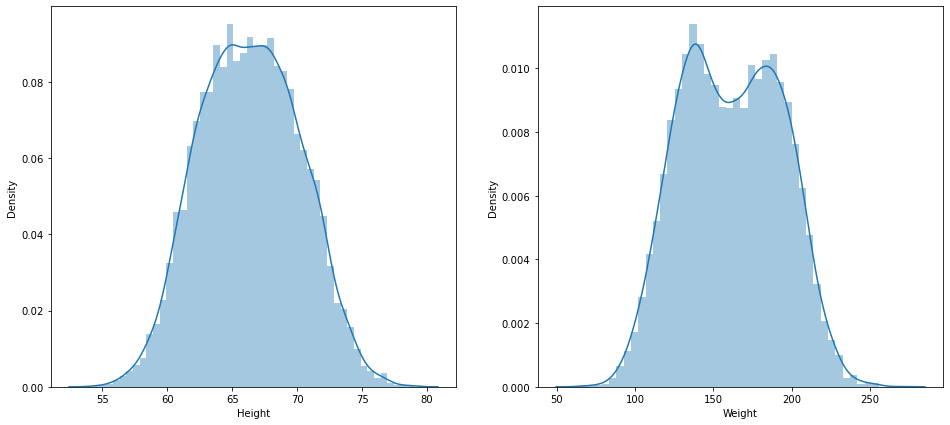

In [108]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)

sns.distplot(wehe['Height'])

plt.subplot(1,2,2)

sns.distplot(wehe['Weight'])

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

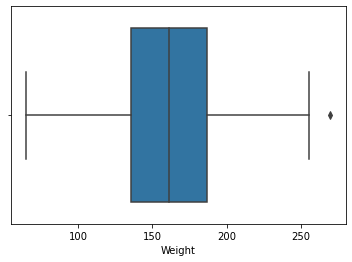

In [113]:
#sns.boxplot(wehe['Height'])

sns.boxplot(wehe['Weight'])

In [122]:
Up_limit = wehe['Height'].quantile(0.99)
L_limit = wehe['Height'].quantile(0.01)


In [123]:
print(Up_limit)
print(L_limit)

74.7857900583366
58.13441158671655


In [138]:
wehe[(wehe['Height'] <= Up_limit) & (wehe['Height'] >= L_limit)]

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
